# Bike Share Analysis of the Ford GoBike System
## by Margaret Maina



## Investigation Overview


In this project, I investigated the characteristics of bike users and their trips that could help predict the bike trip duation. The feature of interest was the trip duration which I then compared with different characteristics such as the user type, gender and age.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system(Ford GoBike) that covers the greater San Francisco Bay area in 2019. I changed the trip duration variable's unit from seconds to minutes. I also calculated the ages of the bike users from thier birth year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df =  pd.read_csv(r'C:\Users\Thee Megg\Downloads\201902-fordgobike-tripdata.csv')
bike_data = df.copy()
bike_data['duration_min'] = bike_data['duration_sec'] / 60


## Distribution of Bike Trip Duration

Trip duration in the dataset take on a very large range of values, from about 1 minutes at the lowest, to about 1400 minutes at the highest. The distribution of diamond prices takes on a unimodal shape, with a peak at around 10-15 minutes.

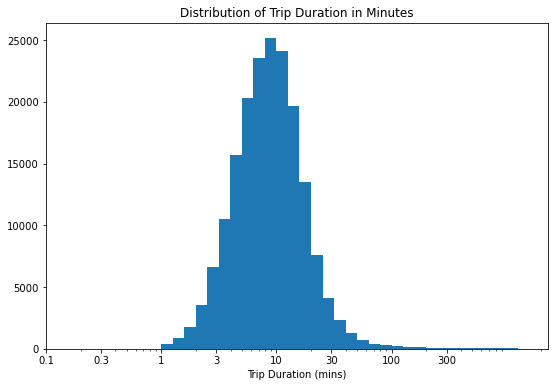

In [3]:
#Set figure size
plt.figure(figsize = [9, 6])

# plot a histogram of the distribution, limit the x axis and select appropriate bin size
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(bike_data['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = bike_data, x = 'duration_min', bins = bins)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.xlabel("Trip Duration (mins)")
plt.title("Distribution of Trip Duration in Minutes")
plt.show();

## Effects of Gender, User Type and Bike_Share on Trip Duration

From the pairgrid, the bike trips were mostly by users between the ages of 20 and 45. Of these, more were male than female and other in terms of gender. There were also almost a similar number of customers and subscribers. However, more females above the age of 70 rode the bikes than the other two genders.

This plot also confrims the earlier relationships between trip duration and the three variables- gender, user_type and bike_share_for_all_trip. Female users rode the bikes for longer than the other genders. Customers also had longer bike trips than subscribers. Bike_share_for_all_trip rides lasted shorter than the others.

<Figure size 864x432 with 0 Axes>

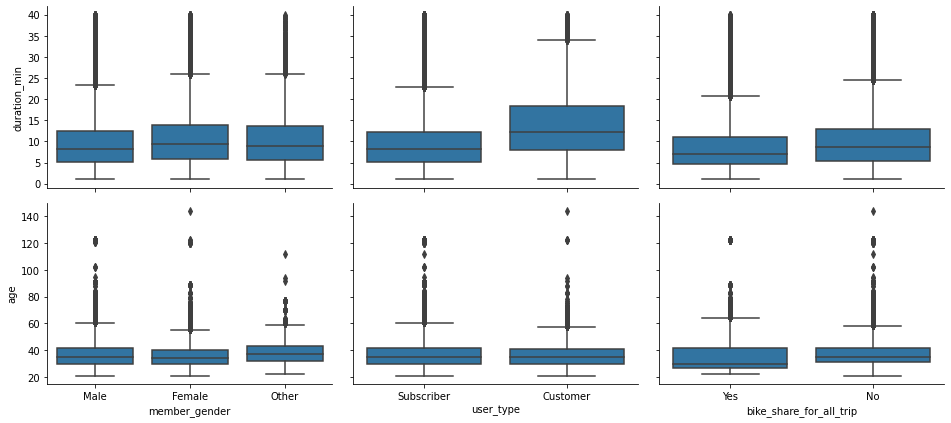

In [4]:
# Q2. How are the trip durations and age influeced by gender, user type and bike_share_for_all?

def calculate_age(born):
    today = date.today()
    return today.year - born

bike_data['age'] = bike_data.member_birth_year.map(calculate_age)

base_color = sns.color_palette()[0]

plt.figure(figsize = (12,6))

trip_dur = bike_data.query("duration_min < 40") #plot only trips shorter than 40 minutes

g = sns.PairGrid(data = trip_dur, x_vars = ["member_gender", "user_type", "bike_share_for_all_trip"],
                y_vars = ["duration_min", "age"], height = 3, aspect = 1.5);
g.map(sns.boxplot, color=base_color);

## Relationship between Gender, Age and Trip Duration
From the plot, male users used Ford GoBike more than female and other users. However, the age range of the bike users remained the same for all three genders.


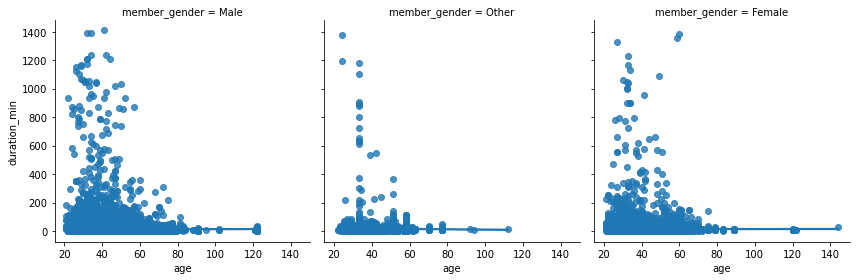

In [5]:
g = sns.FacetGrid(data = bike_data, col = "member_gender", height = 4.0,
                margin_titles = True)
g.map(sns.regplot, "age", "duration_min");

In [7]:
!jupyter nbconvert P3_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook P3_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 657442 bytes to P3_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 508, in conv